importing dataset

In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/x.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CM

In [54]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import QuantileTransformer , PowerTransformer


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score


In [55]:
columns = ['unit_nr', 'time_cycles'] + ['setting_{}'.format(i) for i in range(1, 4)] + ['s_{}'.format(i) for i in range(1, 22)]


train = pd.read_csv(('/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt'), sep='\s+', header=None, 
                 names=columns)
test = pd.read_csv(("/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt"), sep='\s+', header=None, 
                 names=columns)
y_test = pd.read_csv(('/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt'), sep='\s+', header=None, names=['RemainingUsefulLife'])

In [56]:
sensors=['s_{}'.format(i) for i in range(1, 22)]

In [57]:
print(train.shape)
train.head()

(20631, 26)


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [58]:
test.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [59]:
test.shape

(13096, 26)

dataset

In [60]:
train[sensors].describe()

,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
count,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.3,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,0.00,0.500053,6.131150,9.000605,1.776400e-15,0.001389,0.885092,0.070985,22.082880,0.0,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.3,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.3,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.3,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.3,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.3,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


nearly 0 standard deviation : s18,s19,s16,s10,s5,s1(optional 6)

corellation

In [61]:
'''correlation = train.corr()

# Get the correlation of each feature with the target variable
target_correlation = correlation['RUL'].drop('RUL')

# Sort the correlation values in descending order
target_correlation = target_correlation.abs().sort_values(ascending=False)

print(target_correlation)'''

"correlation = train.corr()\n\n# Get the correlation of each feature with the target variable\ntarget_correlation = correlation['RUL'].drop('RUL')\n\n# Sort the correlation values in descending order\ntarget_correlation = target_correlation.abs().sort_values(ascending=False)\n\nprint(target_correlation)"

ADDING RUL COLUMN

In [62]:
def calculate_rul(data_frame):
    # Get the maximum time cycle for each unit
    grouped_by_unit = data_frame.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()

    result_frame = data_frame.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)

 
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life

    
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

In [63]:
train = calculate_rul(train)
train.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


Dropping columns

In [64]:
columns_drop=['s_18','s_19','s_1','s_5','s_16','s_10']+['unit_nr', 'time_cycles'] + ['setting_{}'.format(i) for i in range(1, 4)]
X_train = train.drop(columns_drop, axis=1)
y_train = X_train.pop('RUL')

In [65]:
X_train.head()

,s_2,s_3,s_4,s_6,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21
0,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [66]:
y_train.head()

0    191
1    190
2    189
3    188
4    187
Name: RUL, dtype: int64

In [67]:
X_train.describe()

,s_2,s_3,s_4,s_6,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,642.680934,1590.523119,1408.933782,21.609803,553.367711,2388.096652,9065.242941,47.541168,521.413470,2388.096152,8143.752722,8.442146,393.210654,38.816271,23.289705
std,0.500053,6.131150,9.000605,0.001389,0.885092,0.070985,22.082880,0.267087,0.737553,0.071919,19.076176,0.037505,1.548763,0.180746,0.108251
min,641.210000,1571.040000,1382.250000,21.600000,549.850000,2387.900000,9021.730000,46.850000,518.690000,2387.880000,8099.940000,8.324900,388.000000,38.140000,22.894200
25%,642.325000,1586.260000,1402.360000,21.610000,552.810000,2388.050000,9053.100000,47.350000,520.960000,2388.040000,8133.245000,8.414900,392.000000,38.700000,23.221800
50%,642.640000,1590.100000,1408.040000,21.610000,553.440000,2388.090000,9060.660000,47.510000,521.480000,2388.090000,8140.540000,8.438900,393.000000,38.830000,23.297900
75%,643.000000,1594.380000,1414.555000,21.610000,554.010000,2388.140000,9069.420000,47.700000,521.950000,2388.140000,8148.310000,8.465600,394.000000,38.950000,23.366800
max,644.530000,1616.910000,1441.490000,21.610000,556.060000,2388.560000,9244.590000,48.530000,523.380000,2388.560000,8293.720000,8.584800,400.000000,39.430000,23.618400


In [68]:
X_test = test.groupby('unit_nr').last().reset_index().drop(columns_drop, axis=1)

In [69]:
X_test.head()

,s_2,s_3,s_4,s_6,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21
0,642.58,1581.22,1398.91,21.61,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552
1,642.55,1586.59,1410.83,21.61,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618
2,642.88,1589.75,1418.89,21.61,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740
3,642.78,1594.53,1406.88,21.61,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581
4,642.27,1589.94,1419.36,21.61,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117


evaluation metric

In [70]:
def evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    return [r2,mse,rmse,mae]
def print_evaluate(l):
    print("R-squared Error: {:.4f}".format(l[0]))
    print("Mean Squared Error: {:.4f}".format(l[1]))
    print("Root Mean Squared Error: {:.4f}".format(l[2]))
    print("Mean Absolute Error: {:.4f}".format(l[3]))

       


In [71]:
# Example model names
model_names = ["Linear Regression", "Random Forest", "SVR", "XGB Regressor", "GB Regressor"]

# Create an empty DataFrame
evaluation_df = pd.DataFrame(index=model_names, columns=["R2", "MSE", "RMSE", "MAE"])

print(evaluation_df)

                    R2  MSE RMSE  MAE
Linear Regression  NaN  NaN  NaN  NaN
Random Forest      NaN  NaN  NaN  NaN
SVR                NaN  NaN  NaN  NaN
XGB Regressor      NaN  NaN  NaN  NaN
GB Regressor       NaN  NaN  NaN  NaN


Linear regression

In [72]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [73]:
#test
y_predict_lr = linear_model.predict(X_test)
print_evaluate(evaluate(y_test, y_predict_lr))

R-squared Error: 0.4089
Mean Squared Error: 1020.7881
Root Mean Squared Error: 31.9498
Mean Absolute Error: 25.5363


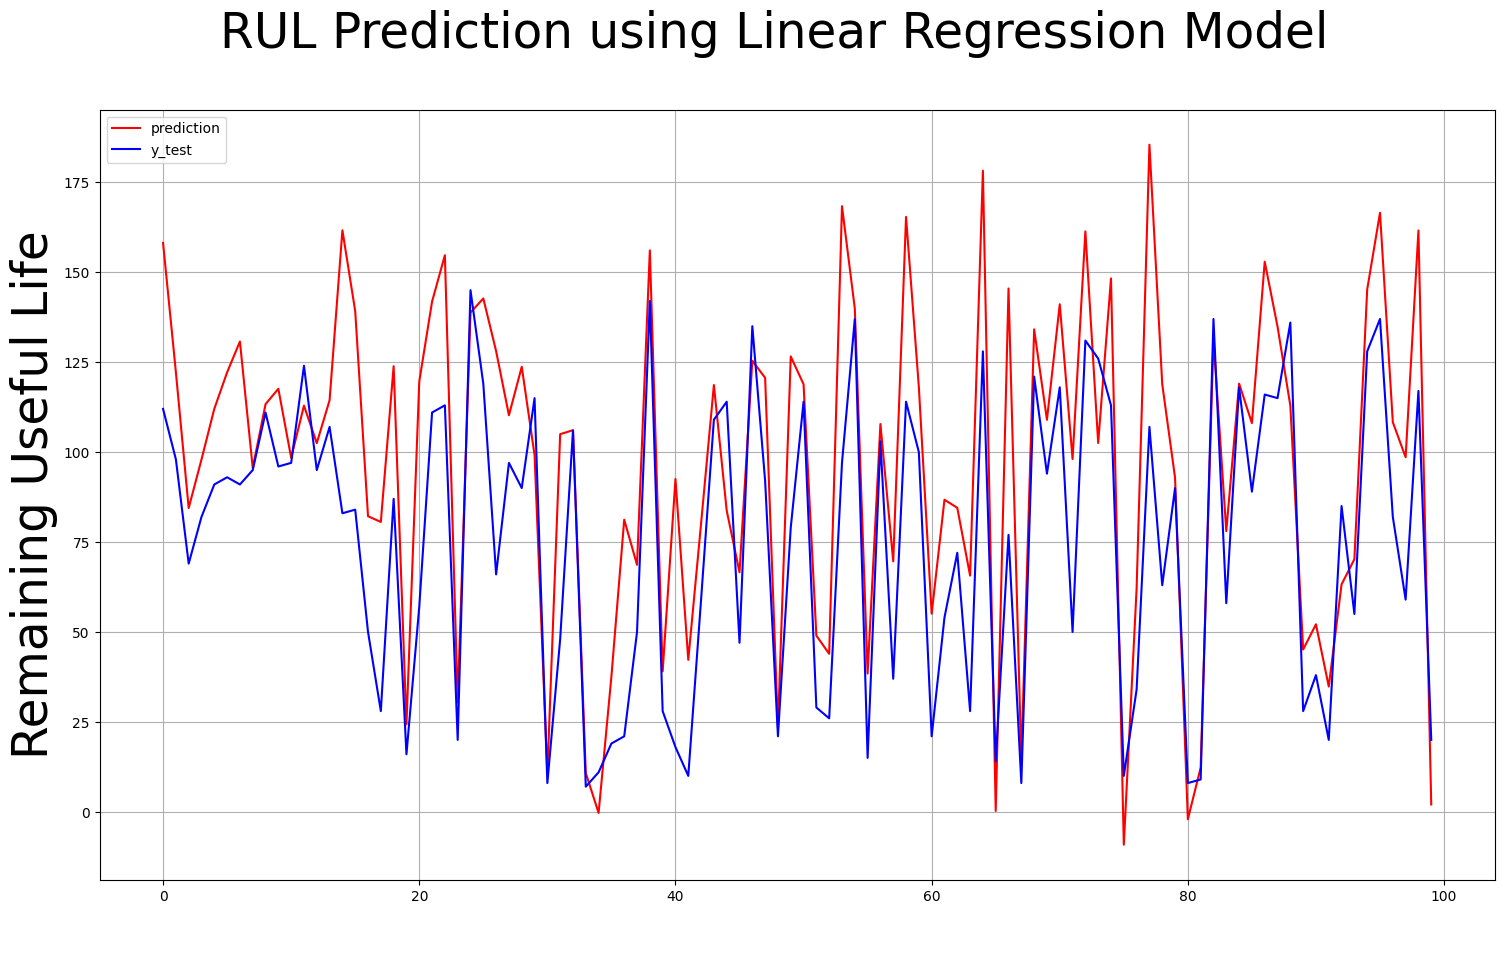

In [74]:
def rul_plot(y_predict,y_test,text):
    
    fig = plt.figure(figsize=(18,10))
    plt.plot(y_predict,c='red',label='prediction')
    plt.plot(y_test,c='blue',label='y_test')

    fig.suptitle(text, fontsize=35)
    plt.xlabel(" ", fontsize=35)
    plt.ylabel("Remaining Useful Life", fontsize=35)

    plt.legend(loc='upper left')
    plt.grid()
    plt.show()
metrics = evaluate(y_test, y_predict_lr)  # Replace with your actual data
evaluation_df.loc["Linear Regression"] = metrics
rul_plot(y_predict_lr,y_test,'RUL Prediction using Linear Regression Model')

Random Forest

In [75]:
# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=42, 
                           max_depth=8, min_samples_leaf=50)

# Train the model
rf_model.fit(X_train, y_train)



RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=50,
                      random_state=42)

In [76]:
y_predict_rf = rf_model.predict(X_test)
print_evaluate(evaluate(y_test, y_predict_rf))

R-squared Error: 0.4815
Mean Squared Error: 895.3220
Root Mean Squared Error: 29.9219
Mean Absolute Error: 22.2313


In [77]:
metrics = evaluate(y_test, y_predict_rf)  # Replace with your actual data
evaluation_df.loc["Random Forest"] = metrics

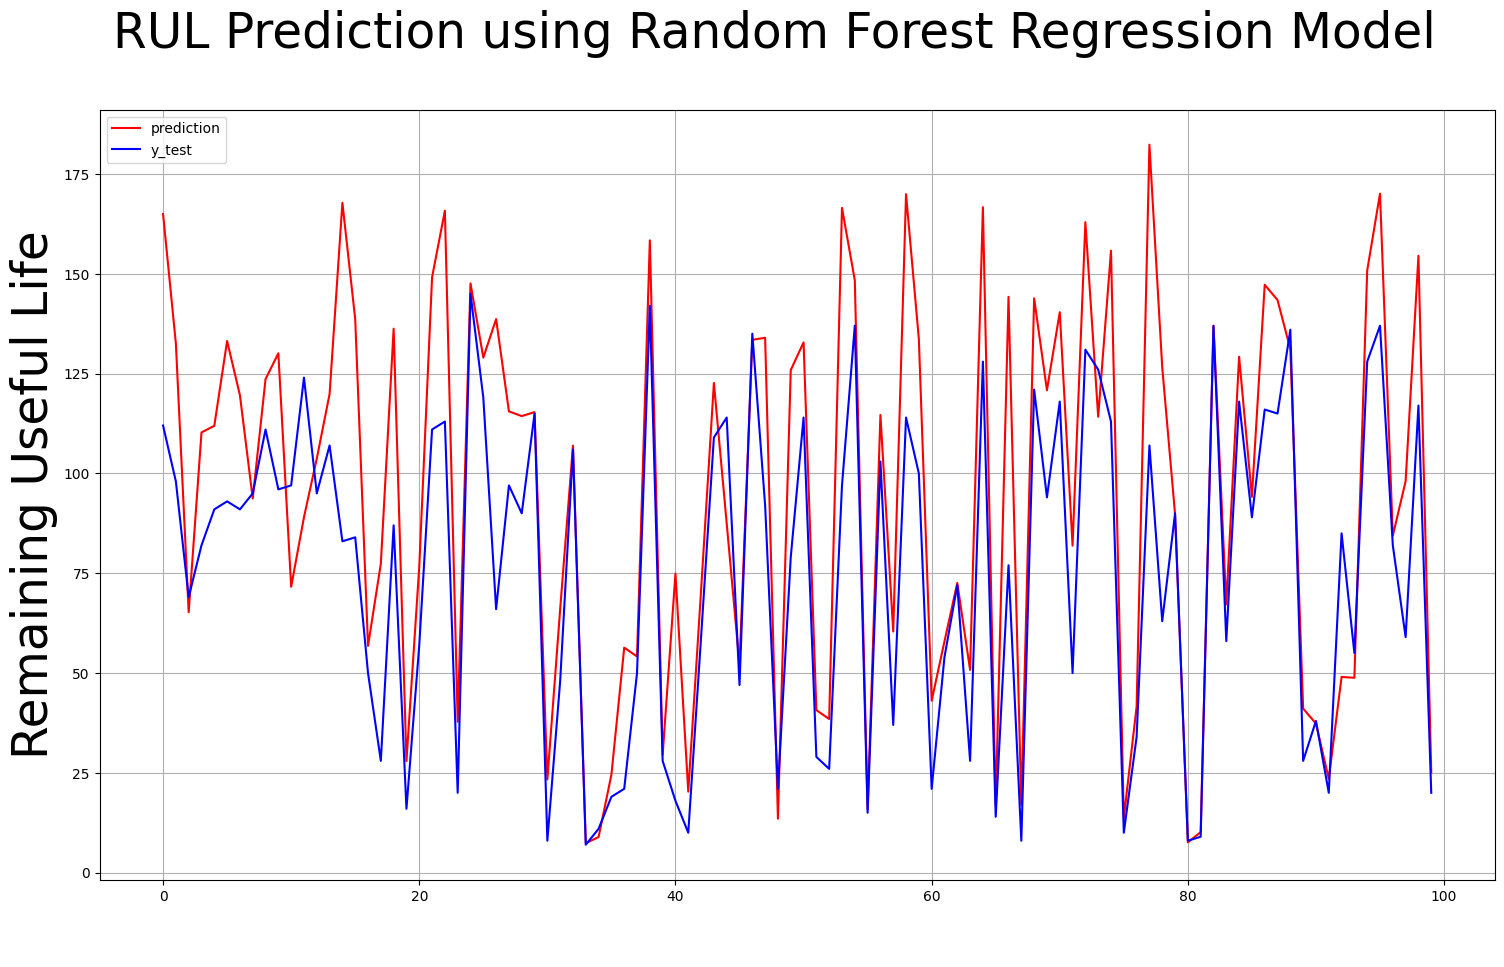

In [78]:
rul_plot(y_predict_rf,y_test,'RUL Prediction using Random Forest Regression Model')

SVR

In [79]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [80]:
# Create an SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model to the training data
svr.fit(X_train_scaled, y_train)

# Predict on the test data
y_predict_svr = svr.predict(X_test_scaled)

In [81]:
print_evaluate(evaluate(y_test, y_predict_svr))

R-squared Error: 0.5886
Mean Squared Error: 710.3695
Root Mean Squared Error: 26.6528
Mean Absolute Error: 19.3328


In [82]:
metrics = evaluate(y_test, y_predict_svr)  # Replace with your actual data
evaluation_df.loc["SVR"] = metrics

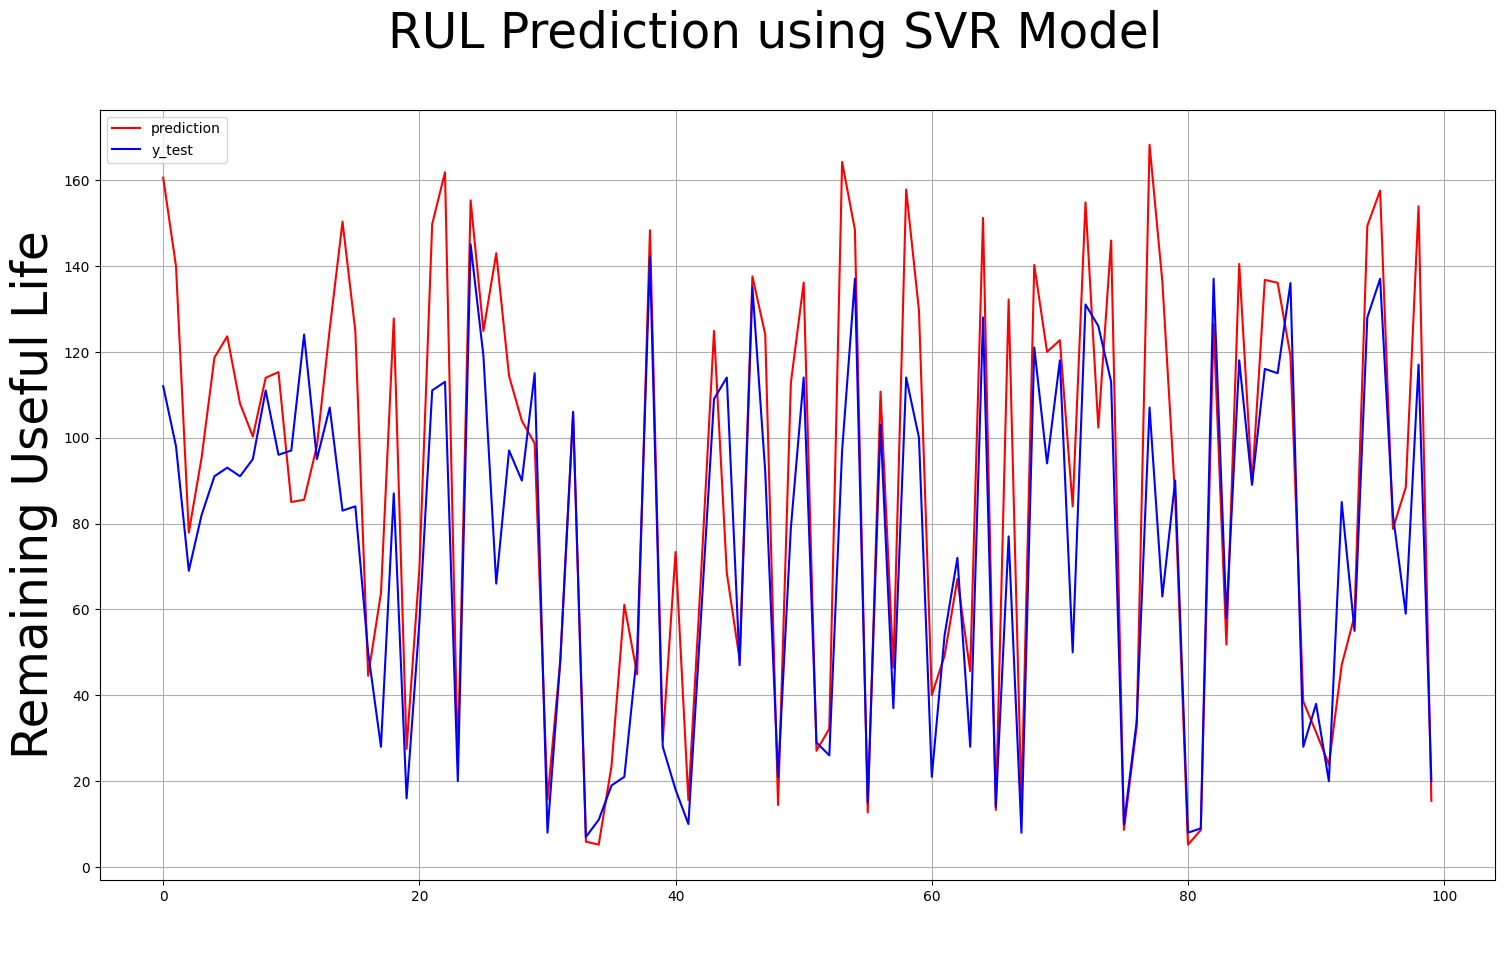

In [83]:
rul_plot(y_predict_svr,y_test,'RUL Prediction using SVR Model')

XGBoost

In [84]:
import xgboost as xgb


# Define the XGBoost regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42,learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=50)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [85]:
# Make predictions on the test set
y_predict_xgb = xgb_model.predict(X_test)
print_evaluate(evaluate(y_test, y_predict_xgb))

R-squared Error: 0.4095
Mean Squared Error: 1019.7830
Root Mean Squared Error: 31.9340
Mean Absolute Error: 22.9345


In [86]:
metrics = evaluate(y_test, y_predict_xgb)  # Replace with your actual data
evaluation_df.loc["XGB Regressor"] = metrics

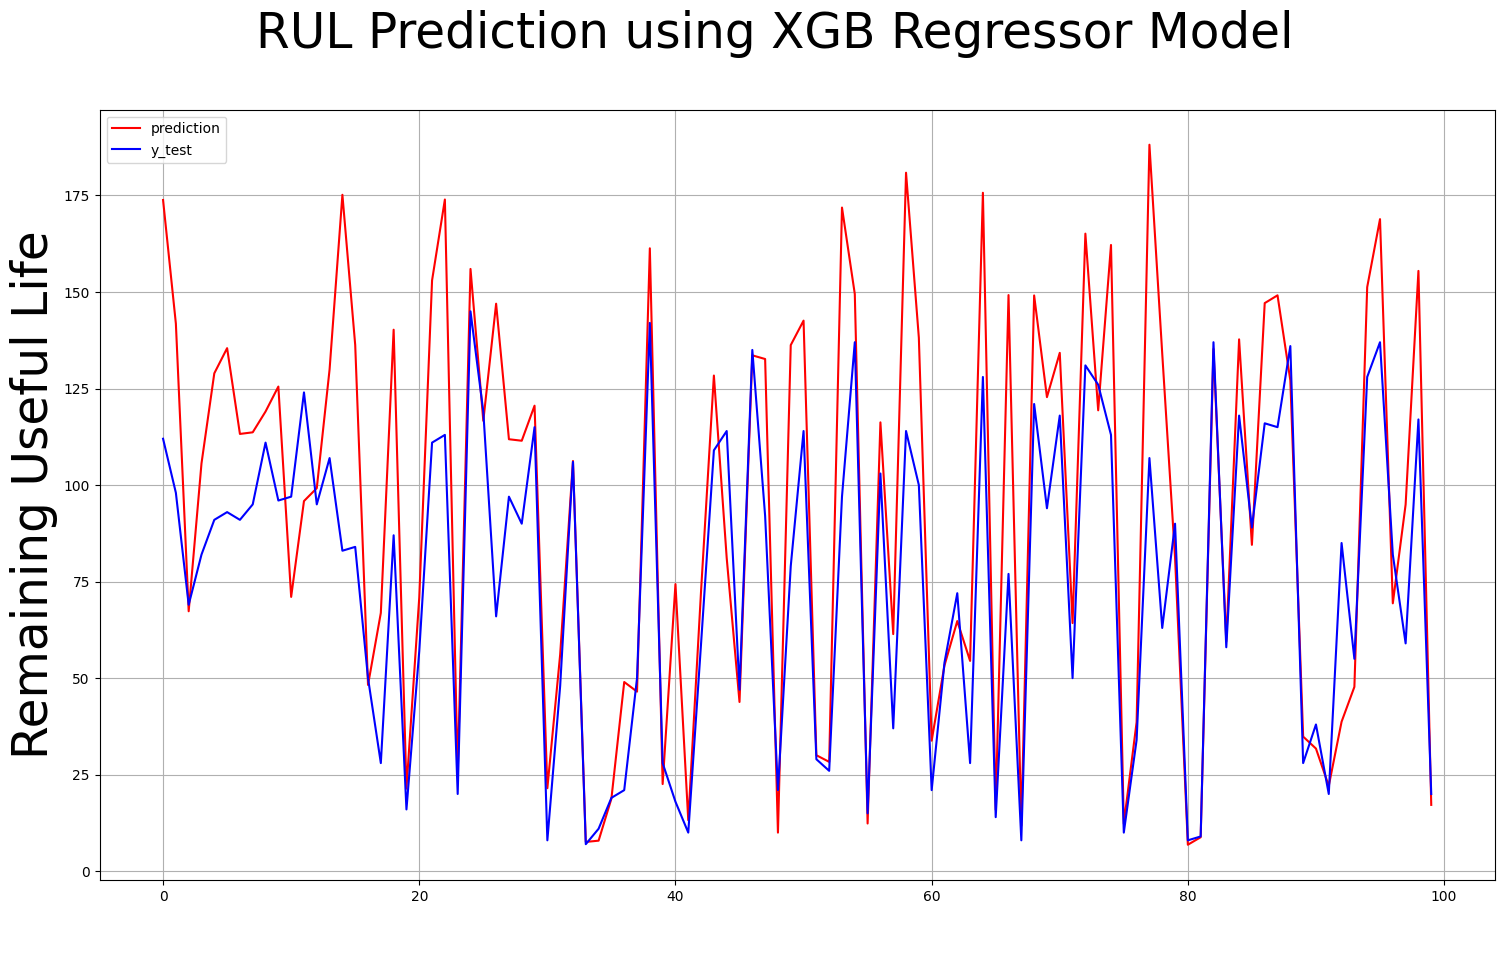

In [87]:
rul_plot(y_predict_xgb,y_test,'RUL Prediction using XGB Regressor Model')

Gradient boost Regressor

In [88]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=50)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=2, n_estimators=50)

In [89]:
y_predict_gb = gb_model.predict(X_test)
print_evaluate(evaluate(y_test, y_predict_gb))

R-squared Error: 0.3981
Mean Squared Error: 1039.4388
Root Mean Squared Error: 32.2403
Mean Absolute Error: 23.4959


In [90]:
metrics = evaluate(y_test, y_predict_gb)  # Replace with your actual data
evaluation_df.loc["GB Regressor"] = metrics

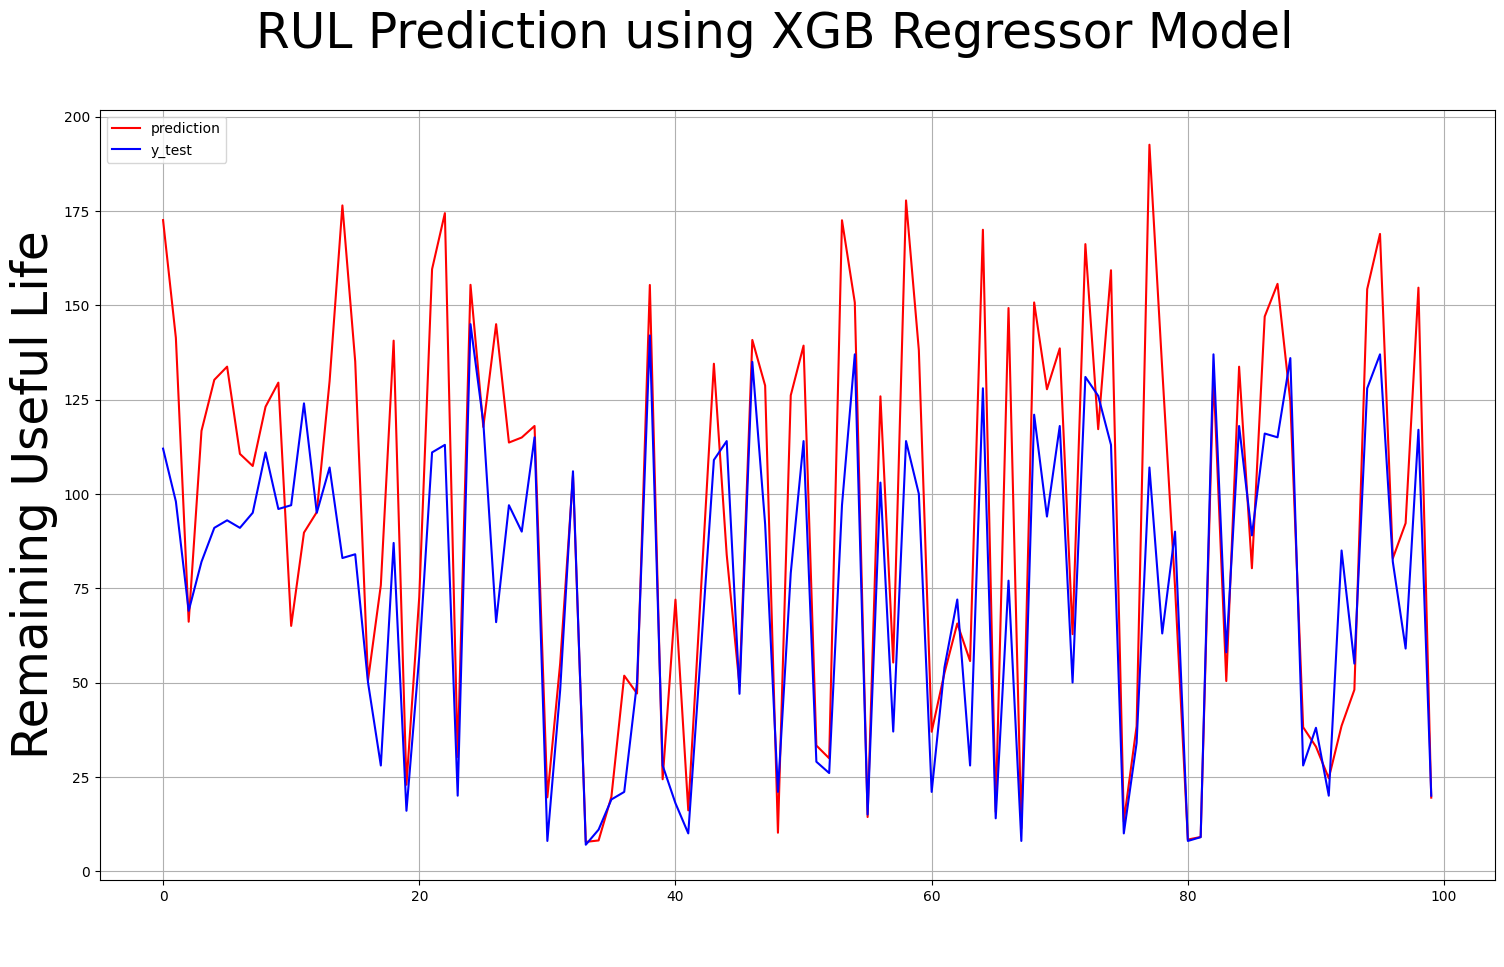

In [91]:
rul_plot(y_predict_gb,y_test,'RUL Prediction using XGB Regressor Model')

In [92]:
# Assuming you have already trained your SVR, Random Forest, and Linear Regression models
from sklearn.metrics import mean_squared_error
import sklearn
svr_predictions = svr.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

# Create a new dataset using the predictions of the base models
ensemble_inputs = np.column_stack((svr_predictions, rf_predictions, xgb_predictions))

# Train a Ridge Regression meta-model on the ensemble inputs
meta_model = sklearn.linear_model.Ridge(alpha=1.0)  # You can adjust the hyperparameters as needed
meta_model.fit(ensemble_inputs, y_test)

# Make predictions using the ensemble
ensemble_predictions = meta_model.predict(ensemble_inputs)

# Calculate mean squared error (MSE) as the performance metric
print_evaluate(evaluate(y_test, ensemble_predictions))

R-squared Error: 0.7988
Mean Squared Error: 347.4753
Root Mean Squared Error: 18.6407
Mean Absolute Error: 13.6508


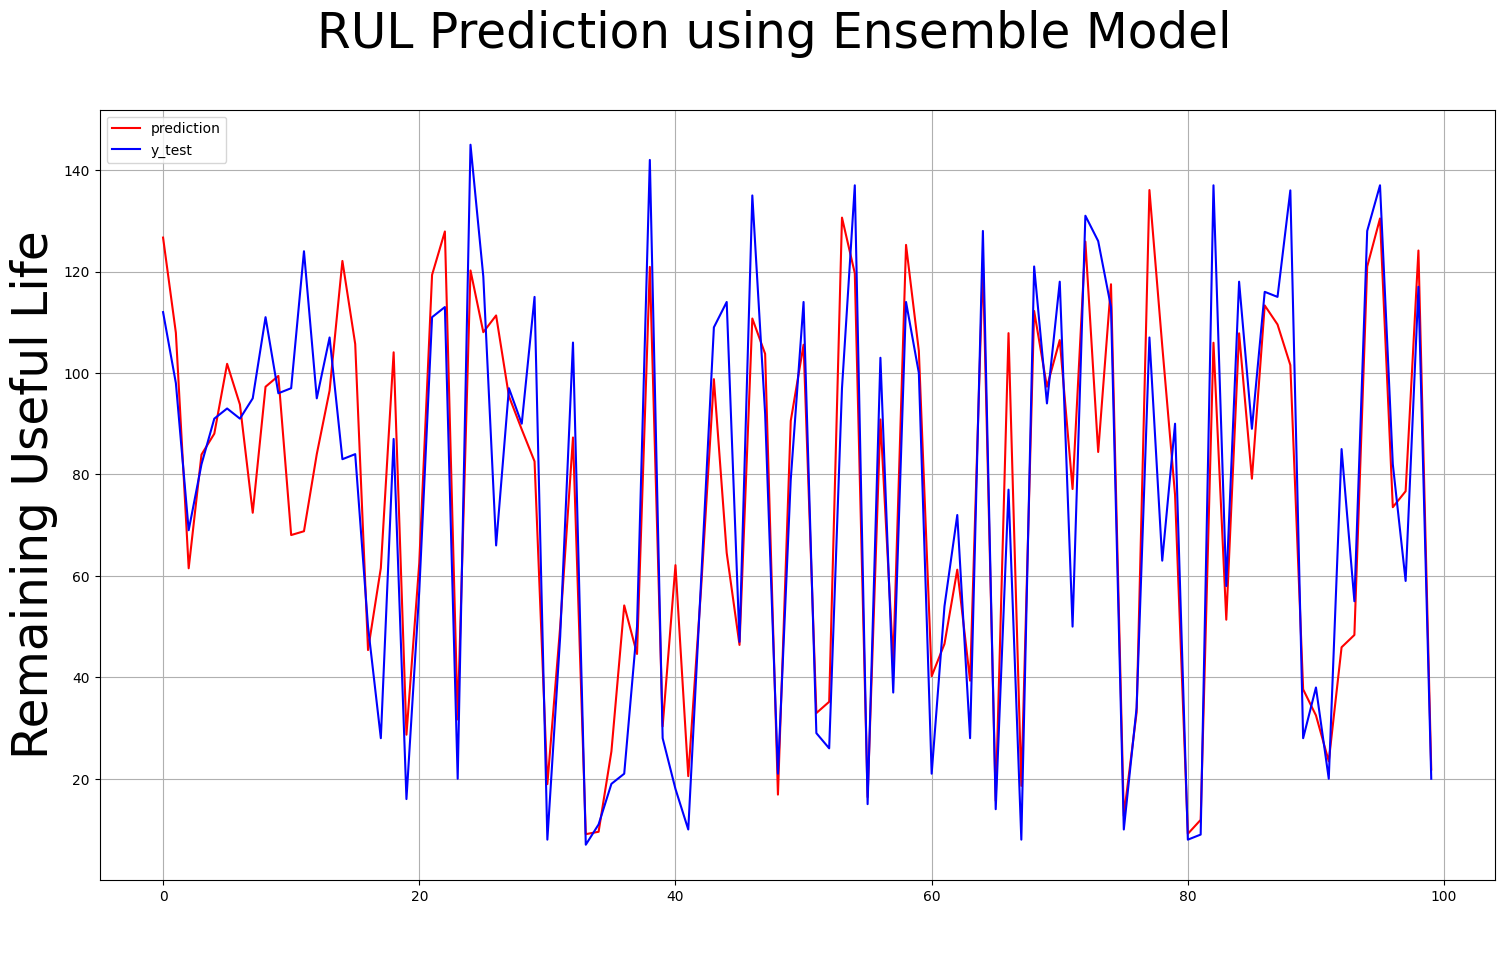

In [93]:
rul_plot(ensemble_predictions,y_test,'RUL Prediction using Ensemble Model')

Evaluation table

In [94]:

# Display the DataFrame
display(evaluation_df)


,R2,MSE,RMSE,MAE
Linear Regression,0.408879,1020.788094,31.949775,25.536288
Random Forest,0.481535,895.321992,29.921932,22.231344
SVR,0.588637,710.369538,26.652759,19.332831
XGB Regressor,0.409461,1019.783049,31.934042,22.93452
GB Regressor,0.398079,1039.438819,32.240329,23.495923
